Solve the function approximation problem for \( f(x) = x \sin(5x) \)

First, the DeepXDE and NumPy (np) modules are imported

In [1]:
import deepxde as dde
import numpy as np

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


Define the simple function which will be approximated.\
The argument x to func is the network input. \
The func simply returns the corresponding function values from the given x.

In [2]:
def func(x):
    """
    x: array_like, N x D_in
    y: array_like, N x D_out
    """
    return x * np.sin(5 * x)

Then, we define a computational domain. We can use a built-in class Interval as follows

In [3]:
geom = dde.geometry.Interval(-1, 1)

Now, we have specified the geometry, we need to define the problem using a built-in class Function\
Here, we use 16 points for training sampled inside the domain, and 100 points for testing.

In [4]:
num_train = 16
num_test = 100
data = dde.data.Function(geom, func, num_train, num_test)

Next, we choose a fully connected neural network of depth 4 (i.e., 3 hidden layers) and width 20 with tanh as the activation function and Glorot uniform as the initializer

In [5]:
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)

Now, we have the function approximation problem and the network. We bulid a Model and choose the optimizer adam and the learning rate of 0.001

In [6]:
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

Compiling model...
'compile' took 0.000120 s



Train the model for 10000 iterations

In [7]:
losshistory, train_state = model.train(iterations=10000)

Training model...

Step      Train loss    Test loss     Test metric   
0         [4.06e-01]    [3.56e-01]    [1.31e+00]    
1000      [6.71e-04]    [5.83e-04]    [5.28e-02]    
2000      [1.91e-04]    [2.00e-04]    [3.10e-02]    
3000      [2.99e-05]    [5.64e-05]    [1.64e-02]    
4000      [5.50e-06]    [2.93e-05]    [1.19e-02]    
5000      [6.90e-07]    [2.06e-05]    [9.92e-03]    
6000      [2.05e-06]    [2.03e-05]    [9.85e-03]    
7000      [5.65e-07]    [1.87e-05]    [9.45e-03]    
8000      [2.56e-07]    [1.76e-05]    [9.18e-03]    
9000      [1.98e-07]    [1.71e-05]    [9.04e-03]    
10000     [2.18e-06]    [2.03e-05]    [9.85e-03]    

Best model at step 9000:
  train loss: 1.98e-07
  test loss: 1.71e-05
  test metric: [9.04e-03]

'train' took 2.868937 s



 Save and plot the best trained result and loss history.

Saving loss history to /Users/zhaoping_ying/Documents/GitHub/PINN-ODE/loss.dat ...
Saving training data to /Users/zhaoping_ying/Documents/GitHub/PINN-ODE/train.dat ...
Saving test data to /Users/zhaoping_ying/Documents/GitHub/PINN-ODE/test.dat ...


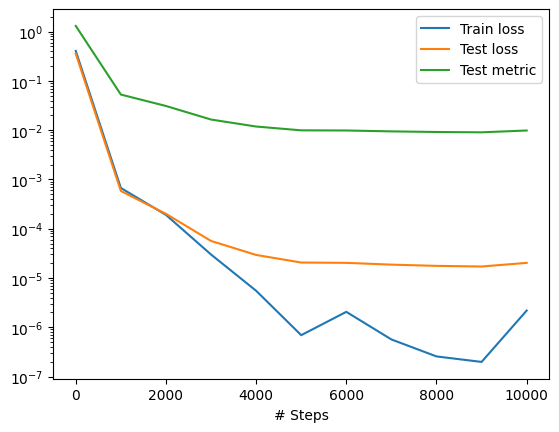

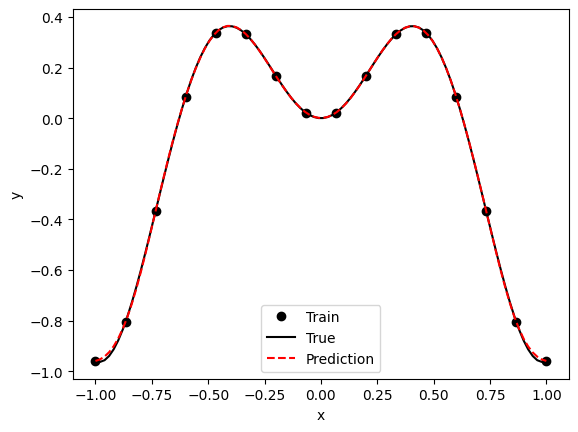

In [8]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)